In [1]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import when,lit, count,desc,countDistinct, col, when
#Pyspark session
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Exploratory Analysis") \
    .getOrCreate()

In [2]:
#loading file
parking_data = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
parking_data

DataFrame[Summons Number: bigint, Plate ID: string, Registration State: string, Issue Date: timestamp, Violation Code: int, Vehicle Body Type: string, Vehicle Make: string, Violation Precinct: int, Issuer Precinct: int, Violation Time: string]

In [3]:
#details of Parking NYC data set
parking_data.show(10)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|         Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23 00:00:00|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|         

In [4]:
# describe parking data
parking_data.describe().show()

+-------+--------------------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|      Summons Number|Plate ID|Registration State|    Violation Code| Vehicle Body Type|      Vehicle Make|Violation Precinct|  Issuer Precinct|   Violation Time|
+-------+--------------------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|  count|            10803028|10803028|          10803028|          10803028|          10803028|          10803028|          10803028|         10803028|         10803028|
|   mean|6.8174470290656595E9|Infinity|              99.0|34.599430455979565|3.9258887134586864| 6519.974025974026| 45.01216260848347|46.82931211508477|909.2857142857143|
| stddev|2.3202339623282285E9|     NaN|               0.0|19.359868716323483|0.5013415469252523|18091.257389147086|40.552560268435805|62.66703577

In [5]:
# check Schema
parking_data.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: timestamp (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Violation Time: string (nullable = true)



# Data Cleaning

In [6]:
# Drop na
parking_data=parking_data.dropna()
parking_data.count()

10803028

In [7]:
# Drop duplicates in parking Nyc dataset
parking_data=parking_data.dropDuplicates()
parking_data.count()

10803028

In [8]:
#Number of Summons
parking_data.select('Summons Number').distinct().count()

10803028

In [9]:
#creating data frame for in parking Nyc dataset
parking_data= parking_data.toDF(*(c.replace(' ', '_') for c in parking_data.columns))
parking_data.show(10)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    1412807402| HCA1864|                NY|2016-08-23 00:00:00|            21|              P-U|       DODGE|                70|              0|         0100A|
|    4630370353| HEJ9882|                NY|2017-02-06 00:00:00|            36|             SUBN|        JEEP|                 0|              0|         0100P|
|    4631509016| HFL8696|                NY|2017-03-09 00:00:00|            36|             SUBN|       NISSA|                 0|              0|         0100P|
|    4633332156|T711205C|         

In [10]:
# create table
parking_data.createOrReplaceTempView("parkingData")

In [11]:
# Check Value
spark.sql("SELECT COUNT(*) AS NULL_COUNT FROM parkingData WHERE Registration_State IS NULL").show()

+----------+
|NULL_COUNT|
+----------+
|         0|
+----------+



In [12]:
# Check Value
spark.sql("SELECT COUNT(*) AS NULL_COUNT FROM parkingData WHERE Plate_ID IS NULL").show()

+----------+
|NULL_COUNT|
+----------+
|         0|
+----------+



In [13]:
# Check Nulls
spark.sql("Select count(*) as Number_of_Null_Values from parkingData where Summons_Number is NULL or Plate_ID is NULL or Registration_State is NULL or Issue_Date is NULL or Violation_Code is NULL or Vehicle_Body_Type is NULL or Vehicle_Make is NULL or Violation_Precinct is NULL or Issuer_Precinct is NUll or Violation_Time is NULL ").show()

+---------------------+
|Number_of_Null_Values|
+---------------------+
|                    0|
+---------------------+



In [14]:
#writing SQL query
spark.sql('Select * from parkingData limit 10').show()

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5094338420|  581691|                NY|2016-11-18 00:00:00|             7|             SUBN|         KIA|                 0|              0|         0100P|
|    4625534045| GPV3977|                NY|2016-10-20 00:00:00|            36|             SUBN|       NISSA|                 0|              0|         0100P|
|    4633162032| HFL8081|                NY|2017-04-28 00:00:00|            36|             4DSD|       DODGE|                 0|              0|         0100P|
|    5093558291| HJE5292|         

# Examine the data

In [15]:
# Total number of tickets for each year
ticket_PerYear = spark.sql("select year(Issue_Date) as year, count(Summons_Number) as no_of_tickets from parkingData group by year order by year")
ticket_PerYear.show(100)

+----+-------------+
|year|no_of_tickets|
+----+-------------+
|1972|            2|
|1973|            2|
|1974|            1|
|1976|            1|
|1977|            1|
|1984|            1|
|1985|            1|
|1990|            2|
|1991|            3|
|1994|            1|
|1996|            1|
|1997|            1|
|2000|          185|
|2001|            2|
|2002|            1|
|2003|            1|
|2004|            2|
|2005|            1|
|2006|            8|
|2007|           18|
|2008|            4|
|2009|            3|
|2010|           48|
|2011|           22|
|2012|           87|
|2013|           70|
|2014|          120|
|2015|          419|
|2016|      5368391|
|2017|      5431918|
|2018|         1057|
|2019|          472|
|2020|           22|
|2021|           22|
|2022|            4|
|2023|            5|
|2024|            3|
|2025|            6|
|2026|           24|
|2027|           50|
|2028|            8|
|2029|            2|
|2030|           12|
|2031|            5|
|2033|       

In [16]:
spark.sql("select count(Summons_Number) as no_of_tickets from parkingData").show()

+-------------+
|no_of_tickets|
+-------------+
|     10803028|
+-------------+



In [17]:
# Filtering only 2017 data
parking_data.createOrReplaceTempView("parkingData2017")
parking_data=spark.sql("select * from parkingData2017 where year(TO_DATE(CAST(UNIX_TIMESTAMP(Issue_Date,'MM/dd/yyyy') AS TIMESTAMP))) = 2017 ")
parking_data.count()

5431918

1. Total number of tickets for the year is 5431918

In [18]:
parking_data.createOrReplaceTempView("parkingData2017")

Q2. Find out the number of unique states from where the cars that got parking tickets came.

In [19]:
dataQ2 = spark.sql("SELECT distinct(Registration_State), Count(*) as Number_of_Records from parkingData2017 group by Registration_State order by Number_of_Records desc")
dataQ2.count()

65

In [20]:
dataQ2.show(72)

+------------------+-----------------+
|Registration_State|Number_of_Records|
+------------------+-----------------+
|                NY|          4273951|
|                NJ|           475825|
|                PA|           140286|
|                CT|            70403|
|                FL|            69468|
|                IN|            45525|
|                MA|            38941|
|                VA|            34367|
|                MD|            30213|
|                NC|            27152|
|                TX|            18827|
|                IL|            18666|
|                GA|            17537|
|                99|            16055|
|                AZ|            12379|
|                OH|            12281|
|                CA|            12153|
|                ME|            10806|
|                SC|            10395|
|                MN|            10083|
|                OK|             9088|
|                TN|             8514|
|                DE|     

In [21]:
spark.sql("SELECT Count(*) as Number_of_Records from parkingData2017").show()

+-----------------+
|Number_of_Records|
+-----------------+
|          5431918|
+-----------------+



In [22]:
parking_data=parking_data.withColumn('Registration_State',when(parking_data["Registration_State"]==99,lit('NY')).otherwise(parking_data["Registration_State"]))
parking_data.createOrReplaceTempView("parkingData2017")

In [23]:
# Checking Again
state = spark.sql("SELECT Registration_State, Count(*) as Ticket_Frequency from parkingData2017 group by Registration_State order by Ticket_Frequency desc")

In [24]:
state.count()

64

In [25]:
state.show(70)

+------------------+----------------+
|Registration_State|Ticket_Frequency|
+------------------+----------------+
|                NY|         4290006|
|                NJ|          475825|
|                PA|          140286|
|                CT|           70403|
|                FL|           69468|
|                IN|           45525|
|                MA|           38941|
|                VA|           34367|
|                MD|           30213|
|                NC|           27152|
|                TX|           18827|
|                IL|           18666|
|                GA|           17537|
|                AZ|           12379|
|                OH|           12281|
|                CA|           12153|
|                ME|           10806|
|                SC|           10395|
|                MN|           10083|
|                OK|            9088|
|                TN|            8514|
|                DE|            7905|
|                MI|            7231|
|           

2. Number of unique states from where the cars that got parking tickets came is 64

# Aggregation tasks

How often does each violation code occur? Display the frequency of the top five violation codes.

In [26]:
# Frequency of each violation code
ViolationCodeCount = parking_data.select("Violation_Code")\
  .groupBy("Violation_Code")\
.agg(count("Violation_Code")\
.alias("no_of_tickets"))\
.sort(desc("no_of_tickets"))

ViolationCodeCount.show(100)

+--------------+-------------+
|Violation_Code|no_of_tickets|
+--------------+-------------+
|            21|       768087|
|            36|       662765|
|            38|       542079|
|            14|       476664|
|            20|       319646|
|            46|       312330|
|            37|       293147|
|            40|       277184|
|            71|       263393|
|             7|       210176|
|            19|       149062|
|            70|       144647|
|            69|        96914|
|            31|        80593|
|            16|        74790|
|            47|        65440|
|            74|        58939|
|            50|        53749|
|             5|        48081|
|            48|        40987|
|            84|        40943|
|            24|        38460|
|            17|        38449|
|            51|        32764|
|            42|        32008|
|             9|        28685|
|            78|        26776|
|            10|        25923|
|            68|        25036|
|       

In [27]:
ViolationCodeCount.show(5)

+--------------+-------------+
|Violation_Code|no_of_tickets|
+--------------+-------------+
|            21|       768087|
|            36|       662765|
|            38|       542079|
|            14|       476664|
|            20|       319646|
+--------------+-------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

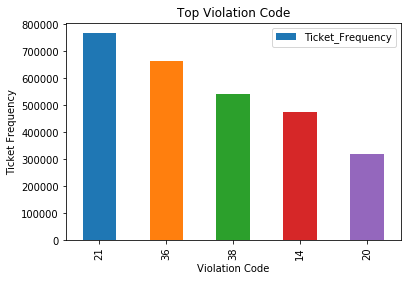

In [28]:
# Graph
query = spark.sql("SELECT Violation_Code, Count(*) as Ticket_Frequency from parkingData2017 group by Violation_code order by Ticket_Frequency desc")
plot = query.toPandas()
plt.clf()
plot.head(5).plot(x='Violation_Code', y='Ticket_Frequency', kind='bar')
plt.title("Top Violation Code")
plt.xlabel('Violation Code')
plt.ylabel('Ticket Frequency')
plt.show()

Q2. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'?

In [29]:
# vehicle Type
vehicleType = spark.sql("SELECT Vehicle_Body_Type, count(*) as Ticket_Frequency from parkingData2017 group by Vehicle_Body_Type order by Ticket_Frequency desc")
vehicleType.show(5)

+-----------------+----------------+
|Vehicle_Body_Type|Ticket_Frequency|
+-----------------+----------------+
|             SUBN|         1883954|
|             4DSD|         1547312|
|              VAN|          724029|
|             DELV|          358984|
|              SDN|          194197|
+-----------------+----------------+
only showing top 5 rows



In [30]:
# Vehicle make
vehicleMake = spark.sql("SELECT Vehicle_Make, count(*) as Ticket_Frequency from parkingData2017 group by Vehicle_Make order by Ticket_Frequency desc")
vehicleMake.show(5)

+------------+----------------+
|Vehicle_Make|Ticket_Frequency|
+------------+----------------+
|        FORD|          636844|
|       TOYOT|          605291|
|       HONDA|          538884|
|       NISSA|          462017|
|       CHEVR|          356032|
+------------+----------------+
only showing top 5 rows



Q3. A precinct is a police station that has a certain zone of the city under its command.

3.1 1.'Violation Precinct' (this is the precinct of the zone where the violation occurred). Using this, can you make any insights for parking violations in any specific areas of the city?

In [31]:
# Violition Precinct
ViolationPrecinct = spark.sql("SELECT Violation_Precinct, count(*) as Ticket_Frequency from parkingData2017 group by Violation_Precinct order by Ticket_Frequency desc")
ViolationPrecinct.show(6)

+------------------+----------------+
|Violation_Precinct|Ticket_Frequency|
+------------------+----------------+
|                 0|          925596|
|                19|          274445|
|                14|          203553|
|                 1|          174702|
|                18|          169131|
|               114|          147444|
+------------------+----------------+
only showing top 6 rows



Data is not collected properly as we can see the Precinct with highest frequency has not been recorded properly

<Figure size 432x288 with 0 Axes>

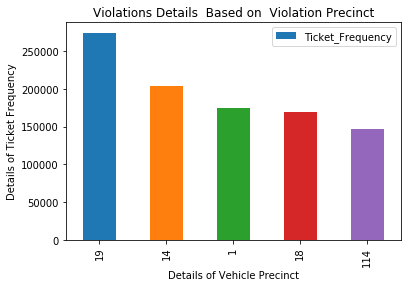

In [32]:
# plot Violations on the basis of Violation Precinct
Crrect_Violation_Precinct_plot = ViolationPrecinct.toPandas()
plt.clf()
Crrect_Violation_Precinct_plot[Crrect_Violation_Precinct_plot.Violation_Precinct!=0].head(5).plot(x='Violation_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Violations Details  Based on  Violation Precinct")
plt.xlabel('Details of Vehicle Precinct')
plt.ylabel('Details of Ticket Frequency')
plt.show()

Corerct Violations Precinct are : 19,14,1,18,114

In [33]:
# Issuer Precinct
IssuePrecinct = spark.sql("SELECT Issuer_Precinct, count(*) as Ticket_Frequency from parkingData2017 group by Issuer_Precinct order by Ticket_Frequency desc")  
IssuePrecinct.show(6)

+---------------+----------------+
|Issuer_Precinct|Ticket_Frequency|
+---------------+----------------+
|              0|         1078406|
|             19|          266961|
|             14|          200495|
|              1|          168740|
|             18|          162994|
|            114|          144054|
+---------------+----------------+
only showing top 6 rows



<Figure size 432x288 with 0 Axes>

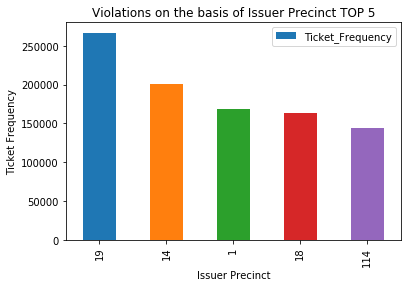

In [34]:
# plot Violations on the basis of Issue_Precinct
Correct_Issuer_Precinct_plot = IssuePrecinct.toPandas()
plt.clf()
Correct_Issuer_Precinct_plot[Correct_Issuer_Precinct_plot.Issuer_Precinct!=0].head(5).plot(x='Issuer_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Issuer Precinct TOP 5")
plt.xlabel('Issuer Precinct')
plt.ylabel('Ticket Frequency')
plt.show()

Corerct Issuer Precinct are : 19,14,1,18,114

Q 4. Find the violation code frequencies for three precincts that have issued the most number of tickets. Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts? 

In [35]:
# Violitions
violation_code_freq = spark.sql("select Issuer_Precinct,Violation_Code, count(*) as Frequency from parkingData2017 where Issuer_Precinct != 0 and Violation_Precinct !=0 group by Issuer_Precinct, Violation_Code order by Frequency desc" )
violation_code_freq.show(3)

+---------------+--------------+---------+
|Issuer_Precinct|Violation_Code|Frequency|
+---------------+--------------+---------+
|             18|            14|    50148|
|             19|            46|    48410|
|             14|            14|    45024|
+---------------+--------------+---------+
only showing top 3 rows



In [36]:
# Issuer_Precinct = 18
spark.sql("select Violation_Code, count(*) as Frequency from parkingData2017 where Issuer_Precinct = 18 group by Violation_Code order by Frequency desc").show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    50150|
|            69|    20189|
|            47|    14107|
|            31|    11893|
|            46|     7863|
+--------------+---------+
only showing top 5 rows



In [37]:
# Issuer_Precinct  = 19
spark.sql("select Violation_Code, count(*) as Frequency from parkingData2017 where Issuer_Precinct  = 19 group by Violation_Code order by Frequency desc").show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|    48445|
|            38|    36386|
|            37|    36056|
|            14|    29797|
|            21|    28415|
+--------------+---------+
only showing top 5 rows



In [38]:
# Issuer_Precinct = 14
spark.sql("select Violation_Code, count(*) as Frequency from parkingData2017 where Issuer_Precinct = 14 group by Violation_Code order by Frequency desc").show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    45036|
|            69|    30464|
|            31|    22555|
|            47|    18364|
|            42|    10027|
+--------------+---------+
only showing top 5 rows



In [39]:
# Common Violations
spark.sql("select Violation_Code, count(*) as Frequency from parkingData2017 where Issuer_Precinct in (18,19,14) group by Violation_Code order by Frequency desc").show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|   124983|
|            46|    63987|
|            69|    53563|
|            38|    45831|
|            37|    39548|
+--------------+---------+
only showing top 5 rows



Precinct 18 and 14 has less similar top violation code. But 19 has very different top violation code.

Q5. Find out the properties of parking violations across different times of the day

In [40]:
# Check null
spark.sql("SELECT count(*) as No_of_Count_Values from parkingData2017 WHERE Violation_Time is NULL").show()

+------------------+
|No_of_Count_Values|
+------------------+
|                 0|
+------------------+



In [41]:
# print null cols
parking_data.where(col("Violation_Time").isNull()).show()

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



In [42]:
# Divide 24 hours into six equal discrete bins of time.
parkingDataBins=spark.sql("SELECT Summons_Number, Violation_Code , Violation_Time, Issuer_Precinct, case when substring(Violation_Time,1,2) in ('00','01','02','03','12') and upper(substring(Violation_Time,-1))='A' then 1 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='A' then 2 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='A' then 3 when substring(Violation_Time,1,2) in ('12','00','01','02','03') and upper(substring(Violation_Time,-1))='P' then 4 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='P' then 5 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='P' then 6 else null end as Violation_Time_bin from parkingData2017 where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
parkingDataBins.show()

+--------------+--------------+--------------+---------------+------------------+
|Summons_Number|Violation_Code|Violation_Time|Issuer_Precinct|Violation_Time_bin|
+--------------+--------------+--------------+---------------+------------------+
|    8509712827|            53|         1109A|              5|                 3|
|    8550208723|            10|         1104A|             61|                 3|
|    7006744659|            14|         1157A|            109|                 3|
|    4634345766|            36|         0127P|              0|                 4|
|    7494851008|            14|         0431P|            109|                 5|
|    8480419428|            84|         1006A|             17|                 3|
|    8483083346|            69|         0858A|             17|                 3|
|    5095638253|             7|         0640A|              0|                 2|
|    8505270850|            37|         1227P|              9|                 4|
|    8505962758|

In [43]:
parkingDataBins.createOrReplaceTempView("parkingData2017Bin")

Bin       Time Interval 
1         12:00 AM to 4:00 AM
2         4:00 AM to 8:00 AM
3         8:00 AM to 12:00 PM
4         12:00 PM to 4:00 PM
5         4:00 PM to 8:00 PM
6         8:00 PM to 12:00 AM

In [44]:
# violation time count
spark.sql("SELECT Violation_Code,Violation_Time_bin, count(*) count from parkingData2017Bin group by Violation_Code,Violation_Time_bin").show()

+--------------+------------------+------+
|Violation_Code|Violation_Time_bin| count|
+--------------+------------------+------+
|            71|                 4|103231|
|            92|                 2|     1|
|            10|                 2|  3164|
|            62|                 1|   278|
|            41|                 3|   954|
|            23|                 6|   691|
|            48|                 6|   620|
|            69|                 1|     1|
|            16|                 3| 28176|
|            17|                 2|  4278|
|            17|                 1|   996|
|            83|                 6|   252|
|            91|                 6|    35|
|            34|                 5|     1|
|            73|                 4|   738|
|            45|                 4|  1224|
|            79|                 1|    21|
|            58|                 1|     3|
|            80|                 3|   890|
|             6|                 1|    88|
+----------

In [45]:
# Bin_1
spark.sql("select Violation_Code,count(*) Vio_cnt from parkingData2017Bin where Violation_Time_bin == 1 group by Violation_Code order by Vio_cnt desc").show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21|  36957|
|            40|  25866|
|            78|  15528|
+--------------+-------+
only showing top 3 rows



In [46]:
# Bin_2
spark.sql("select Violation_Code,count(*) Vio_cnt from parkingData2017Bin where Violation_Time_bin == 2 group by Violation_Code order by Vio_cnt desc").show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            14|  74114|
|            40|  60652|
|            21|  57897|
+--------------+-------+
only showing top 3 rows



In [47]:
# Bin_3
spark.sql("select Violation_Code,count(*) Vio_cnt from parkingData2017Bin where Violation_Time_bin == 3 group by Violation_Code order by Vio_cnt desc").show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21| 598069|
|            36| 348165|
|            38| 176570|
+--------------+-------+
only showing top 3 rows



In [48]:
# Bin_4
spark.sql("select Violation_Code,count(*) Vio_cnt from parkingData2017Bin where Violation_Time_bin == 4 group by Violation_Code order by Vio_cnt desc").show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            36| 286284|
|            38| 240721|
|            37| 167026|
+--------------+-------+
only showing top 3 rows



In [49]:
# Bin_5
spark.sql("select Violation_Code,count(*) Vio_cnt from parkingData2017Bin where Violation_Time_bin == 5 group by Violation_Code order by Vio_cnt desc").show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            38| 102855|
|            14|  75902|
|            37|  70345|
+--------------+-------+
only showing top 3 rows



In [50]:
# Bin_6
spark.sql("select Violation_Code,count(*) Vio_cnt from parkingData2017Bin where Violation_Time_bin == 6 group by Violation_Code order by Vio_cnt desc").show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|             7|  26293|
|            40|  22337|
|            14|  21045|
+--------------+-------+
only showing top 3 rows



Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).

In [51]:
spark.sql("select Violation_Time_bin, count(*) Vio_count from parkingData2017Bin where Violation_Code in (21, 36, 38) group by Violation_Time_bin order by Vio_count desc").show(3)

+------------------+---------+
|Violation_Time_bin|Vio_count|
+------------------+---------+
|                 3|  1122804|
|                 4|   601700|
|                 5|   116648|
+------------------+---------+
only showing top 3 rows



Bins 3, 4, 5 are have most violations. In day time significantly more vehicles are running and hence more violations.

Q6. Let’s try and find some seasonality in this data:

In [52]:
# First, divide the year into some number of seasons,and find frequencies of tickets for each season
VTicketsSeason = spark.sql("select Violation_Code , Issuer_Precinct, case when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 03 and 05 then 'spring' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 06 and 08 then 'summer' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 09 and 11 then 'autumn' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) in (1,2,12) then 'winter' else 'unknown' end  as season from parkingData2017")
VTicketsSeason.show()

+--------------+---------------+------+
|Violation_Code|Issuer_Precinct|season|
+--------------+---------------+------+
|            36|              0|summer|
|            36|              0|summer|
|            48|             78|spring|
|            71|             72|spring|
|            14|            112|spring|
|            71|             67|summer|
|            42|              1|winter|
|            14|             63|winter|
|            36|              0|spring|
|            46|             71|summer|
|            71|             66|winter|
|            14|             84|summer|
|            40|             23|spring|
|            37|            977|spring|
|            20|            114|spring|
|            31|             13|summer|
|            21|             42|spring|
|             7|              0|spring|
|            37|             19|winter|
|            37|            106|spring|
+--------------+---------------+------+
only showing top 20 rows



In [53]:
VTicketsSeason.createOrReplaceTempView("parkingData2017Seasons")

Season    Month intervall

spring    March, April, May
summer    June, July, August
autumn    September, October, November
winter    December, January, February

In [54]:
parkingTicketSeasonsFrequency = spark.sql("select season, count(*) as no_of_tickets from parkingData2017Seasons group by 1 order by 2 desc")
parkingTicketSeasonsFrequency.show()

+------+-------------+
|season|no_of_tickets|
+------+-------------+
|spring|      2873383|
|winter|      1704690|
|summer|       852866|
|autumn|          979|
+------+-------------+



In [55]:
# Spring season
spark.sql("select Violation_Code, count(*) as Frequency from parkingData2017Seasons where Issuer_Precinct in (20, 15, 1) and season = 'spring' group by Violation_Code order by Frequency desc" ).show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    24458|
|            46|    12637|
|            38|    11897|
+--------------+---------+
only showing top 3 rows



In [56]:
# Summer season
spark.sql("select Violation_Code, count(*) as Frequency from parkingData2017Seasons where Issuer_Precinct in (20, 15, 1) and season = 'summer' group by Violation_Code order by Frequency desc" ).show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|     7025|
|            20|     5798|
|            46|     3981|
+--------------+---------+
only showing top 3 rows



In [57]:
# Autumn season
spark.sql("select Violation_Code, count(*) as Frequency from parkingData2017Seasons where Issuer_Precinct in (20, 15, 1) and season = 'autumn' group by Violation_Code order by Frequency desc" ).show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|        5|
|            14|        4|
|            78|        3|
+--------------+---------+
only showing top 3 rows



In [58]:
# Winter season
spark.sql("select Violation_Code, count(*) as Frequency from parkingData2017Seasons where Issuer_Precinct in (20, 15, 1) and season = 'winter' group by Violation_Code order by Frequency desc" ).show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    14122|
|            38|     7142|
|            16|     7129|
+--------------+---------+
only showing top 3 rows



Q7. The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:

In [59]:
# Find total occurrences of the three most common violation codes
CommonViolation = spark.sql("select Violation_Code, count(*) as Frequency from parkingData2017 group by Violation_Code order by Frequency desc")
CommonViolation.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            21|   768087|
|            36|   662765|
|            38|   542079|
+--------------+---------+
only showing top 3 rows



In [60]:
# find the total amount collected for the three violation codes with the maximum tickets. State the code that has the highest total collection.
CommonViolation.withColumn("fine",when(CommonViolation.Violation_Code == 21, (CommonViolation.Frequency) *50).otherwise((CommonViolation.Frequency)*55)).show(3)
print('Total collection = $',768087*55+662765*50+542079*55)

+--------------+---------+--------+
|Violation_Code|Frequency|    fine|
+--------------+---------+--------+
|            21|   768087|38404350|
|            36|   662765|36452075|
|            38|   542079|29814345|
+--------------+---------+--------+
only showing top 3 rows

Total collection = $ 105197380


Code 21 (Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device) 
had the highest collection.

What can you intuitively infer from these findings?
1. Major violation are in Jan to June but they drop in months from July to Dec.
2. Highest violation & fine collection was collected under Code 21 ie. No parking where parking is not allowed by sign, street marking or traffic control device.

In [61]:
spark.stop()